<a href="https://colab.research.google.com/github/parklaus1078/simple-facial-recognition-application/blob/main/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Preprocessing and Loading the data

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
y = faces.target
target_names = faces.target_names

In [19]:
X[0,:].shape

(2914,)

## Splitting Training and Test Sets

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preparation of the Data

In [5]:
X_train = X_train / 255.0   # Dividing by 244 scales the data to a range of 0 to 1: Usual Picture data normalization step
X_test = X_test / 255.0

## Creating a model

Objective of the model is to identify individual whose face appears in a picture.
In this case, we are using fully connected network, also known as **dense network**. Dense Network is artifical neural network that was used to create the model.

Artifical neural Networks are made of information-processing nodes/neurons

The model has 4 layers in this code.
1. The input data is flattened
2. 128 neurons
3. 64 neurons
4. link

ReLU activation function is unique activation function used by these layers. With that, we can get the model to learn non-linear correlations between the inputs and outputs. The last layer employs the softmax activation function to make predictions.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(62 * 47,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(target_names), activation="softmax"),
])

## Compiling the model

  

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7559 - accuracy: 0.4007
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7530 - accuracy: 0.4007
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7423 - accuracy: 0.4007
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7328 - accuracy: 0.4007
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7207 - accuracy: 0.4007
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7055 - accuracy: 0.4007
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 1.6820 - accuracy: 0.4007
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 1.6607 - accuracy: 0.4137
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 1.6352 - accuracy: 0.4249
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 1.6062 - accuracy: 0.4378
Epoch 11/

## Model Evaluation

The model.evaluation function outputs the test accuracy and test loss. The variables test loss and test accuracy.

- Loss function
</br> Also known as cost function. It measures the inconsistency between the predicted value and the actual value. It maps an event or values of one or more variables onto a real number intuitively represenmting some "cost" associated with the event. **The lower the loss, the better a model**(unless the model has over-fitted to the training data). The loss value represents how well or poorly a certain model behaves after each iteration of optimization

- Accuracy
</br> The accuracy is only valid when the target classes are well balanced. It is calculated as the number of correct predictions made by the model divided by the total number of predictions
$$\frac{TP}{TP + TN + FP + FN}$$


In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

9/9 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.7926
Test loss: 0.7584493160247803
Test accuracy: 0.7925925850868225


In [23]:
predictions = model.predict(X_test)

predicted_classes = [target_names[np.argmax(prediction)] for prediction in predictions]

9/9 [==============================] - 0s 5ms/step


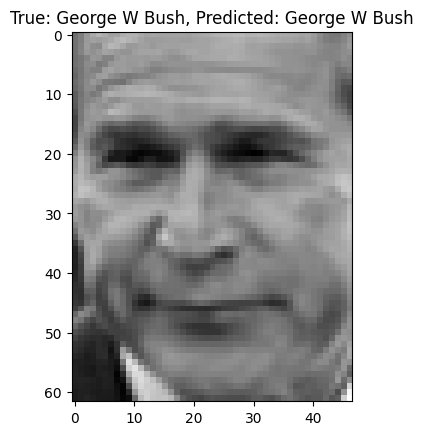

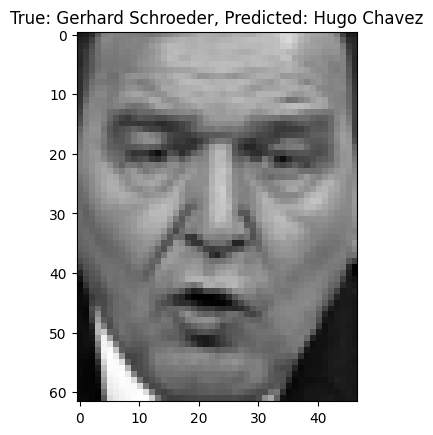

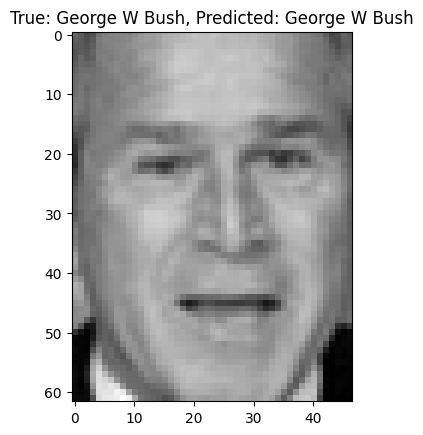

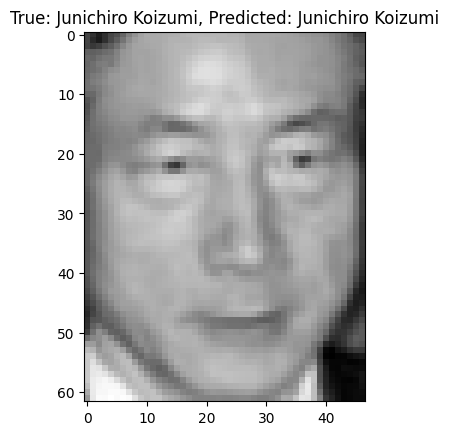

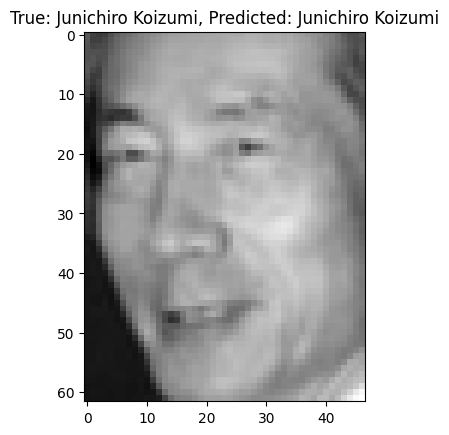

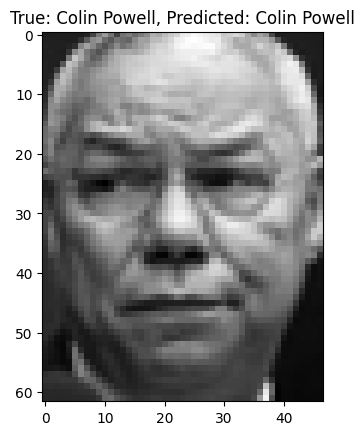

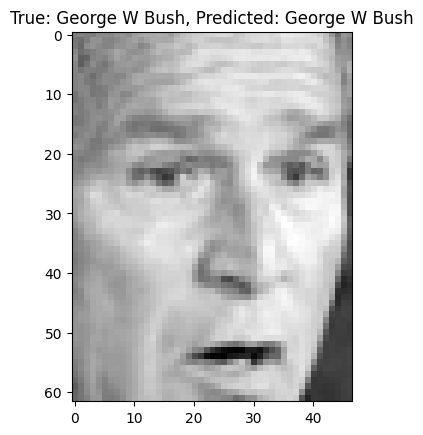

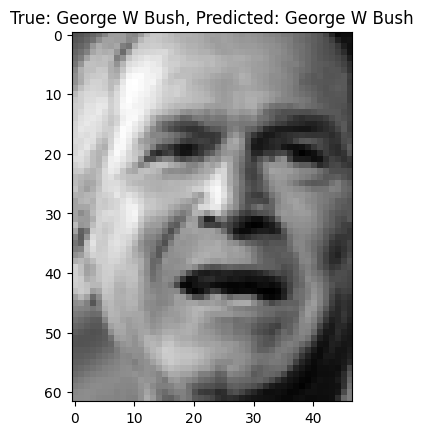

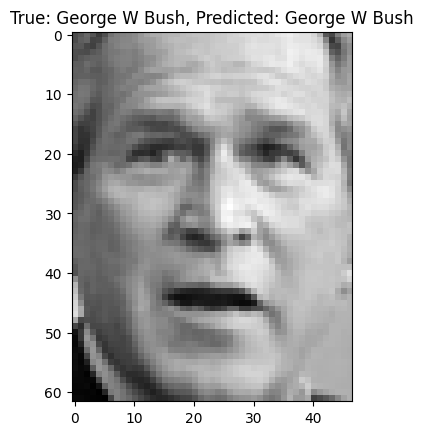

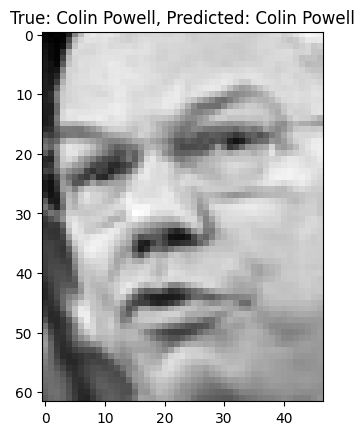

In [24]:
for i in range(10):
    plt.imshow(X_test[i].reshape(62, 47), cmap="gray")
    plt.title(f"True: {target_names[y_test[i]]}, Predicted: {predicted_classes[i]}")
    plt.show()